In [ ]:
import numpy as np # Para funciones matemáticas.
import matplotlib.pyplot as plt # Para graficar.
from scipy.special import * # De aquí usaremos la función lambertw() para la función W de Lambert.
import networkx as nx #Para trabajar con grafos.
from scipy.optimize import fsolve #Para resolver el sistema al final.

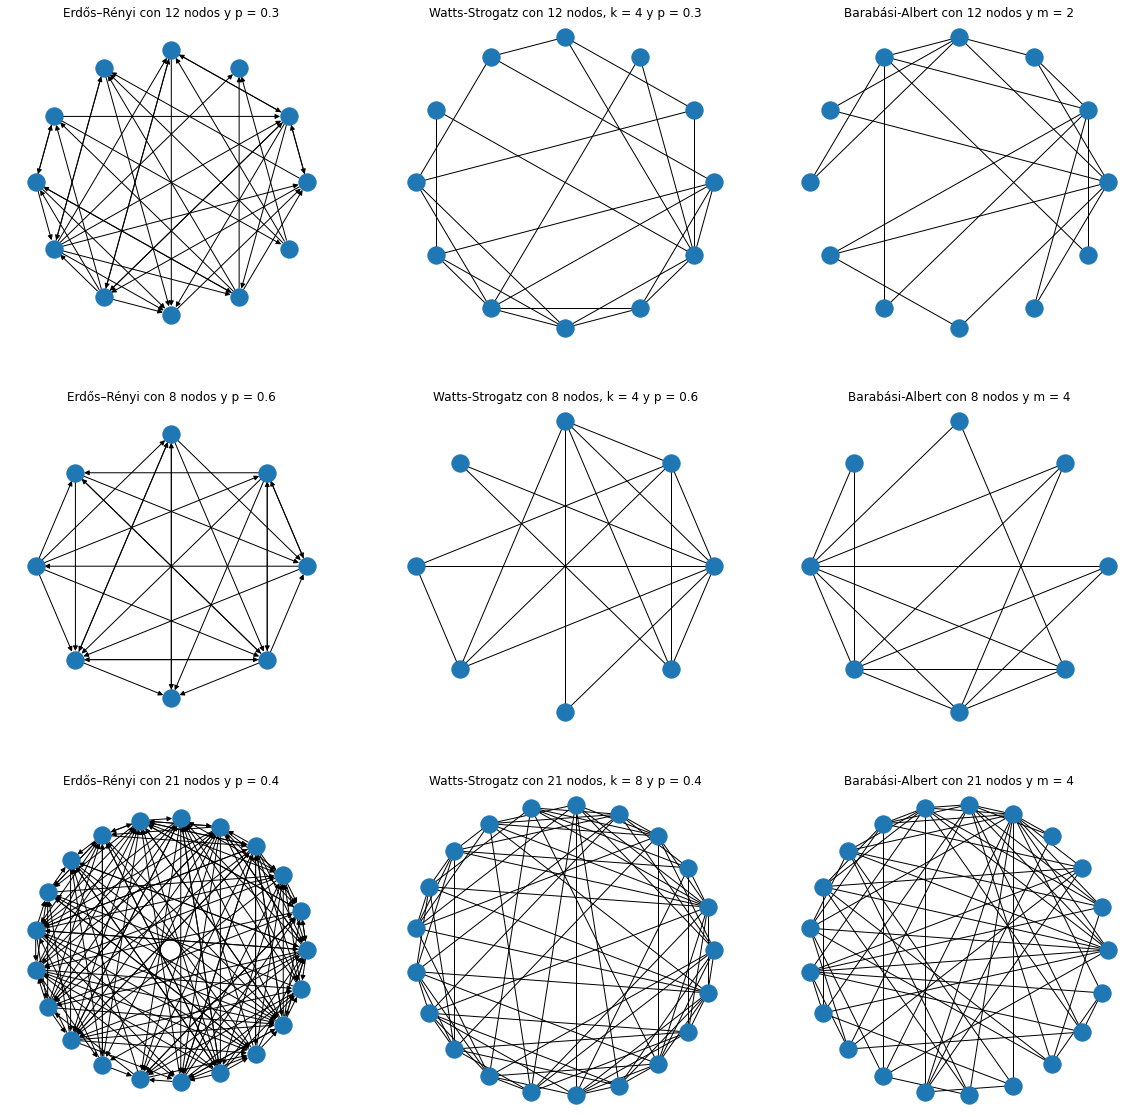

In [ ]:
# Generamos grafos aleatorios de los 3 tipos con distintos valores de los parametros y seed=2248.
# NetworkX solo es capaz de generar grafos dirigidos del tipo Erdős–Rényi, por lo que únicamente éstos tres serán dirigidos.
G11 = nx.erdos_renyi_graph(12, 0.3, seed=2248, directed=True)
G12 = nx.watts_strogatz_graph(12, 4, 0.3, seed=2248)
G13 = nx.barabasi_albert_graph(12, 2, seed=2248)
G21 = nx.erdos_renyi_graph(8, 0.6, seed=2248, directed=True)
G22 = nx.watts_strogatz_graph(8, 4, 0.6, seed=2248)
G23 = nx.barabasi_albert_graph(8, 4, seed=2248)
G31 = nx.erdos_renyi_graph(21, 0.4, seed=2248, directed=True)
G32 = nx.watts_strogatz_graph(21, 8, 0.4, seed=2248)
G33 = nx.barabasi_albert_graph(21, 4, seed=2248)

# Graficamos todos los grafos generados anteriormente.
plt.figure(figsize=(20, 20))
plt.subplot(331).set_title('Erdős–Rényi con 12 nodos y p = 0.3')
nx.draw(G11, pos=nx.circular_layout(G11))
plt.subplot(332).set_title('Watts-Strogatz con 12 nodos, k = 4 y p = 0.3')
nx.draw(G12, pos=nx.circular_layout(G12))
plt.subplot(333).set_title('Barabási-Albert con 12 nodos y m = 2')
nx.draw(G13, pos=nx.circular_layout(G13))
plt.subplot(334).set_title('Erdős–Rényi con 8 nodos y p = 0.6')
nx.draw(G21, pos=nx.circular_layout(G21))
plt.subplot(335).set_title('Watts-Strogatz con 8 nodos, k = 4 y p = 0.6')
nx.draw(G22, pos=nx.circular_layout(G22))
plt.subplot(336).set_title('Barabási-Albert con 8 nodos y m = 4')
nx.draw(G23, pos=nx.circular_layout(G23))
plt.subplot(337).set_title('Erdős–Rényi con 21 nodos y p = 0.4')
nx.draw(G31, pos=nx.circular_layout(G31))
plt.subplot(338).set_title('Watts-Strogatz con 21 nodos, k = 8 y p = 0.4')
nx.draw(G32, pos=nx.circular_layout(G32))
plt.subplot(339).set_title('Barabási-Albert con 21 nodos y m = 4')
nx.draw(G33, pos=nx.circular_layout(G33))

In [ ]:
def FinSizeRelRedEC(G): # Definimos la función que arroja la reducción relativa del Final Size usando Eigencentrality
  xb = nx.eigenvector_centrality_numpy(G)

  tb = 0
  for i in range(len(xb)):
    tb = tb + xb[i]

  e = max(xb, key=lambda key: xb[key])

  G.remove_node(e)

  xa = nx.eigenvector_centrality_numpy(G)

  ta = 0
  for i in range(len(xa)):
    ta = ta + xb[i]

  return ta/tb

def FinSizeRelRedKB(G): # Definimos la función que arroja la reducción relativa del Final Size usando Katz-Bonacich
  xb = nx.katz_centrality_numpy(G)

  tb = 0
  for i in range(len(xb)):
    tb = tb + xb[i]

  e = max(xb, key=lambda key: xb[key])

  G.remove_node(e)

  xa = nx.katz_centrality_numpy(G)

  ta = 0
  for i in range(len(xa)):
    ta = ta + xb[i]

  return ta/tb

def FinSizeRelRedPR(G): # Definimos la función que arroja la reducción relativa del Final Size usando PageRank
  xb = nx.pagerank_numpy(G)

  tb = 0
  for i in range(len(xb)):
    tb = tb + xb[i]

  e = max(xb, key=lambda key: xb[key])

  G.remove_node(e)

  xa = nx.pagerank_numpy(G)

  ta = 0
  for i in range(len(xa)):
    ta = ta + xb[i]

  return ta/tb

In [ ]:
# Calculamos las reducciones relativas usando Eigencentrality.
redEC11 = FinSizeRelRedEC(G11) # Calculamos la reducción relativa del final size dado el grafo de Erdős–Rényi con 12 nodos.
redEC12 = FinSizeRelRedEC(G12) # Calculamos la reducción relativa del final size dado el grafo de Watts-Strogatz con 12 nodos.
redEC13 = FinSizeRelRedEC(G13) # Calculamos la reducción relativa del final size dado el grafo de Barabási-Albert con 12 nodos.
redEC21 = FinSizeRelRedEC(G21) # Calculamos la reducción relativa del final size dado el grafo de Erdős–Rényi con 8 nodos.
redEC22 = FinSizeRelRedEC(G22) # Calculamos la reducción relativa del final size dado el grafo de Watts-Strogatz con 8 nodos.
redEC23 = FinSizeRelRedEC(G23) # Calculamos la reducción relativa del final size dado el grafo de Barabási-Albert con 8 nodos.
redEC31 = FinSizeRelRedEC(G31) # Calculamos la reducción relativa del final size dado el grafo de Erdős–Rényi con 21 nodos.
redEC32 = FinSizeRelRedEC(G32) # Calculamos la reducción relativa del final size dado el grafo de Watts-Strogatz con 21 nodos.
redEC33 = FinSizeRelRedEC(G33) # Calculamos la reducción relativa del final size dado el grafo de Barabási-Albert con 21 nodos.

redEC = np.mean([redEC11, redEC12, redEC13, redEC21, redEC22, redEC23, redEC31, redEC32, redEC33]) # Calculamos la reducción media.

In [ ]:
# Generamos los grafos aleatorios nuevamente pues para el cálculo anterior removimos nodos.
G11 = nx.erdos_renyi_graph(12, 0.3, seed=2248, directed=True)
G12 = nx.watts_strogatz_graph(12, 4, 0.3, seed=2248)
G13 = nx.barabasi_albert_graph(12, 2, seed=2248)
G21 = nx.erdos_renyi_graph(8, 0.6, seed=2248, directed=True)
G22 = nx.watts_strogatz_graph(8, 4, 0.6, seed=2248)
G23 = nx.barabasi_albert_graph(8, 4, seed=2248)
G31 = nx.erdos_renyi_graph(21, 0.4, seed=2248, directed=True)
G32 = nx.watts_strogatz_graph(21, 8, 0.4, seed=2248)
G33 = nx.barabasi_albert_graph(21, 4, seed=2248)

# Calculamos las reducciones relativas usando Katz-Bonacich.
redKB11 = FinSizeRelRedKB(G11) # Calculamos la reducción relativa del final size dado el grafo de Erdős–Rényi con 12 nodos.
redKB12 = FinSizeRelRedKB(G12) # Calculamos la reducción relativa del final size dado el grafo de Watts-Strogatz con 12 nodos.
redKB13 = FinSizeRelRedKB(G13) # Calculamos la reducción relativa del final size dado el grafo de Barabási-Albert con 12 nodos.
redKB21 = FinSizeRelRedKB(G21) # Calculamos la reducción relativa del final size dado el grafo de Erdős–Rényi con 8 nodos.
redKB22 = FinSizeRelRedKB(G22) # Calculamos la reducción relativa del final size dado el grafo de Watts-Strogatz con 8 nodos.
redKB23 = FinSizeRelRedKB(G23) # Calculamos la reducción relativa del final size dado el grafo de Barabási-Albert con 8 nodos.
redKB31 = FinSizeRelRedKB(G31) # Calculamos la reducción relativa del final size dado el grafo de Erdős–Rényi con 21 nodos.
redKB32 = FinSizeRelRedKB(G32) # Calculamos la reducción relativa del final size dado el grafo de Watts-Strogatz con 21 nodos.
redKB33 = FinSizeRelRedKB(G33) # Calculamos la reducción relativa del final size dado el grafo de Barabási-Albert con 21 nodos.

redKB = np.mean([redKB11, redKB12, redKB13, redKB21, redKB22, redKB23, redKB31, redKB32, redKB33]) # Calculamos la reducción media.

In [ ]:
# Generamos los grafos aleatorios nuevamente pues para el cálculo anterior removimos nodos.
G11 = nx.erdos_renyi_graph(12, 0.3, seed=2248, directed=True)
G12 = nx.watts_strogatz_graph(12, 4, 0.3, seed=2248)
G13 = nx.barabasi_albert_graph(12, 2, seed=2248)
G21 = nx.erdos_renyi_graph(8, 0.6, seed=2248, directed=True)
G22 = nx.watts_strogatz_graph(8, 4, 0.6, seed=2248)
G23 = nx.barabasi_albert_graph(8, 4, seed=2248)
G31 = nx.erdos_renyi_graph(21, 0.4, seed=2248, directed=True)
G32 = nx.watts_strogatz_graph(21, 8, 0.4, seed=2248)
G33 = nx.barabasi_albert_graph(21, 4, seed=2248)

# Calculamos las reducciones relativas usando PageRank.
redPR11 = FinSizeRelRedPR(G11) # Calculamos la reducción relativa del final size dado el grafo de Erdős–Rényi con 12 nodos.
redPR12 = FinSizeRelRedPR(G12) # Calculamos la reducción relativa del final size dado el grafo de Watts-Strogatz con 12 nodos.
redPR13 = FinSizeRelRedPR(G13) # Calculamos la reducción relativa del final size dado el grafo de Barabási-Albert con 12 nodos.
redPR21 = FinSizeRelRedPR(G21) # Calculamos la reducción relativa del final size dado el grafo de Erdős–Rényi con 8 nodos.
redPR22 = FinSizeRelRedPR(G22) # Calculamos la reducción relativa del final size dado el grafo de Watts-Strogatz con 8 nodos.
redPR23 = FinSizeRelRedPR(G23) # Calculamos la reducción relativa del final size dado el grafo de Barabási-Albert con 8 nodos.
redPR31 = FinSizeRelRedPR(G31) # Calculamos la reducción relativa del final size dado el grafo de Erdős–Rényi con 21 nodos.
redPR32 = FinSizeRelRedPR(G32) # Calculamos la reducción relativa del final size dado el grafo de Watts-Strogatz con 21 nodos.
redPR33 = FinSizeRelRedPR(G33) # Calculamos la reducción relativa del final size dado el grafo de Barabási-Albert con 21 nodos.

redPR = np.mean([redPR11, redPR12, redPR13, redPR21, redPR22, redPR23, redPR31, redPR32, redPR33]) # Calculamos la reducción media.

In [ ]:
[redEC, redKB, redPR] # Ponemos las tres reducciones medias en un array para poder compararlas.

[0.9166727452857578, 0.9141193067632251, 0.9155369506738723]